In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from ase.io import read
from ase.io.vasp import read_vasp
from ase.visualize import plot


In [5]:
def load_data(file='', columns=['images', 'forces', 'energy', 'rel_energy']) -> pd:
    return pd.read_csv(file, sep='\s+', header=None, names=columns)


### ploting forces vs images

In [7]:
def plot_force_conv(file='nebef.dat', neb_type='CINEB', material='', transition='', image_size=7, thresh_force=0.002):
    fig, ax = plt.subplots()
    force_conv = load_data(file=file)

    thresh_line = pd.DataFrame(
        data={'x': [(i - 1) for i in range(image_size + 1)],
              'threshold': [thresh_force for i in range(image_size + 1)]})

    thresh_line.plot(x='x', y='threshold', color='black', ax=ax)
    force_conv.plot(x='images', y='forces', ylabel='Force (eV/Angst)', ax=ax)
    plt.title(f'Force convgernce of images, {material} {transition}, {neb_type}')

    plt.show()


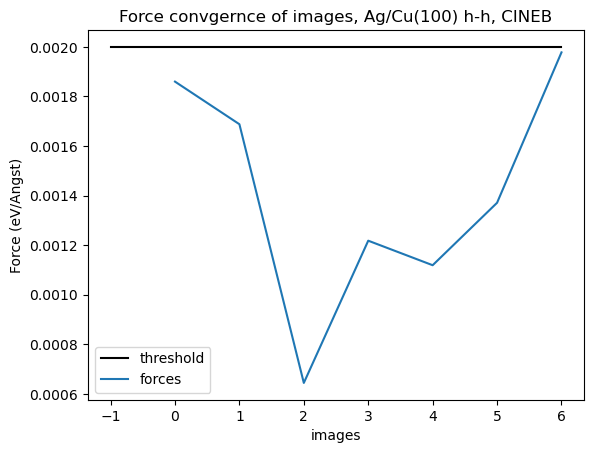

In [8]:
plot_force_conv(material='Ag/Cu(100)', transition='h-h', neb_type='CINEB')

In [10]:
def plot_energies(x='', y='', ylabel='energy (eV)', xlabel='', file='spline.dat', images=[0, 1, 2, 3, 4, 5, 6],
                  title='', save_prefix='', columns=['image_spline', 'rxn_coord', 'energy1', 'energy2'],
                  neb_type='CINEB', material='', transition=''):
    fig, ax = plt.subplots()

    df = load_data(file=file, columns=columns)

    selected_df = df[df['image_spline'].isin(images)]
    x_values = selected_df[x]
    y_values = selected_df[y]

    df.plot(ax=ax, x=x, y=y, ylabel=ylabel, xlabel=xlabel)
    plt.scatter(x=x_values, y=y_values, color='red', marker='o')

    ax.set_title(f'{title}, {material} {transition}, {neb_type}')

    plt.show()


### plot with energy vs images

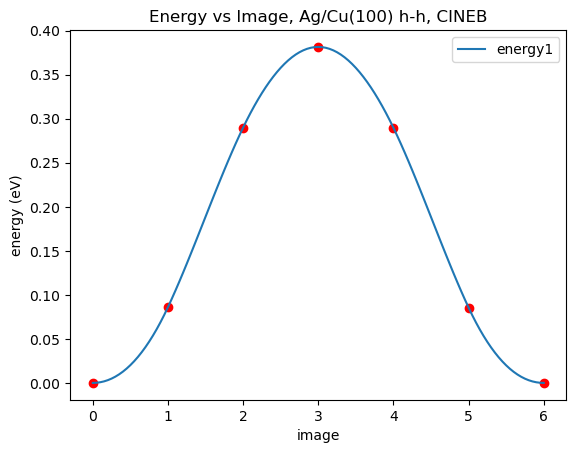

In [11]:
plot_energies(x='image_spline', y='energy1', title='Energy vs Image', save_prefix='energy_images',
              xlabel='image', neb_type='CINEB', material='Ag/Cu(100)', transition='h-h')

### plot energy vs reaction coordinates

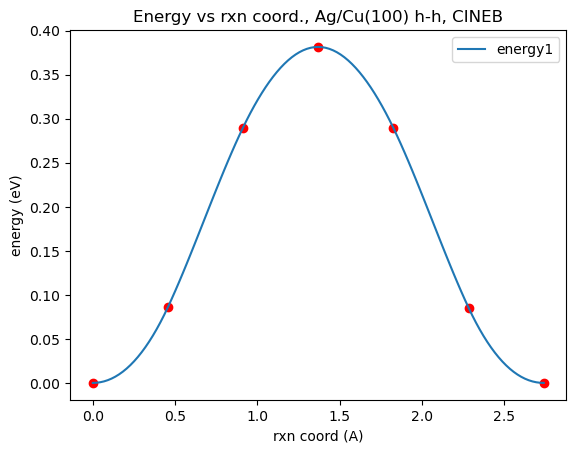

In [12]:
plot_energies(x='rxn_coord', y='energy1', title='Energy vs rxn coord.', save_prefix='energy_rxnCoord',
              xlabel='rxn coord (A)', neb_type='CINEB', material='Ag/Cu(100)', transition='h-h')

## Structural changes analysis

In [13]:
def plot_structures(image_size=7, neb_type='CINEB', material='', transition=''):
    atoms_list = []

    for i in range(image_size):
        atoms = read_vasp('./0' + str(i) +  ('/POSCAR' if False else  ('/POSCAR'  if  i == 0 or i == (image_size-1) else '/CONTCAR') ) 
                      if i < 10 else './' + str(i) + ('/POSCAR' if False else  ('/POSCAR'  if  i == 0 or i == (image_size-1) else '/CONTCAR') ))
        atoms_list.append(atoms)

    for index, image in enumerate(atoms_list):
        fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
        plot.plot_atoms(image, axarr[0], radii=0.3, rotation=('0x,90y,0z'))
        plot.plot_atoms(image, axarr[1], radii=0.3, rotation=('90x,45y,0z'))
        plot.plot_atoms(image, axarr[2], radii=0.3, rotation=('45x,45y,45z'))

        axarr[0].set_title(f"Image {index}, {material}, {transition}, {neb_type} ")
        axarr[1].set_title(f"Image {index}, {material}, {transition}, {neb_type}")
        axarr[0].set_xlabel("Z-axis ($\mathrm{\AA}$)")
        axarr[1].set_xlabel("(Y,X)-axis ($\mathrm{\AA}$)")
        # axarr[2].set_xlabel("Y-axis ($\mathrm{\AA}$)")

        axarr[0].set_ylabel("Y-axis ($\mathrm{\AA}$)")
        axarr[1].set_ylabel("Z-axis ($\mathrm{\AA}$)")











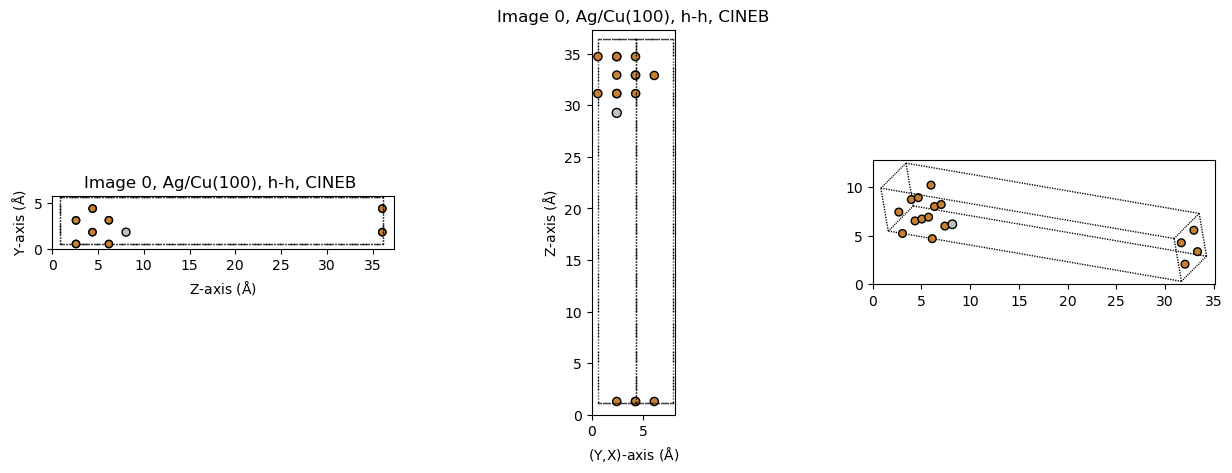

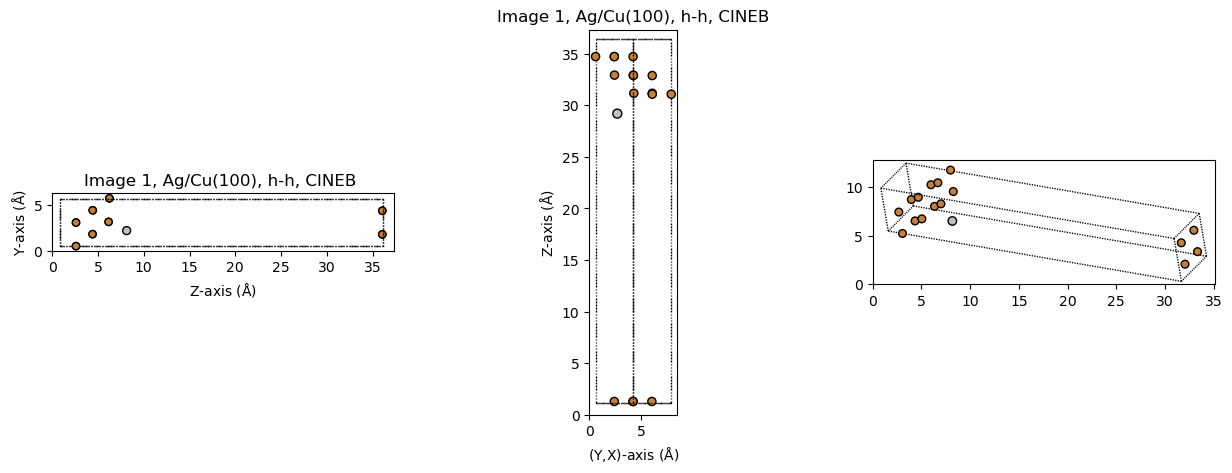

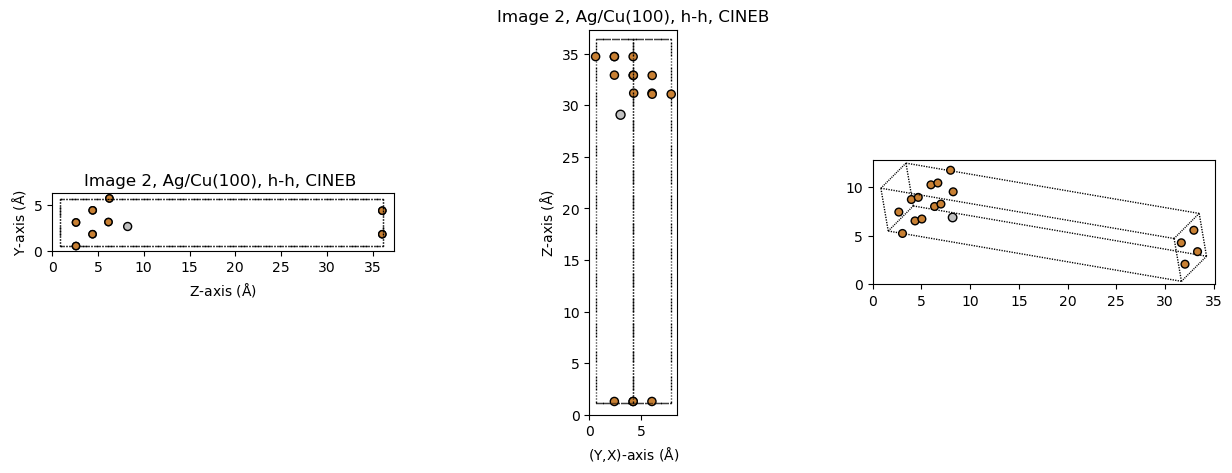

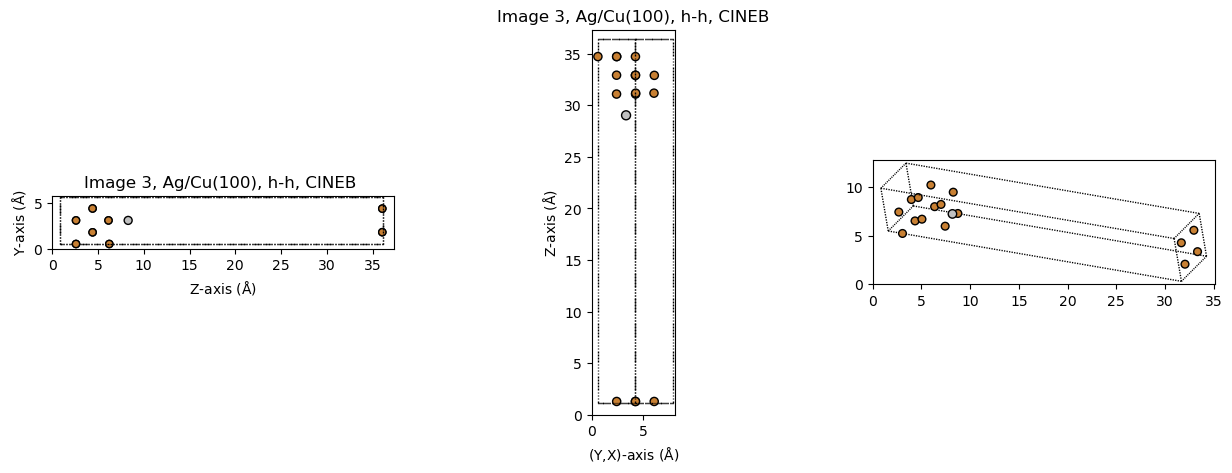

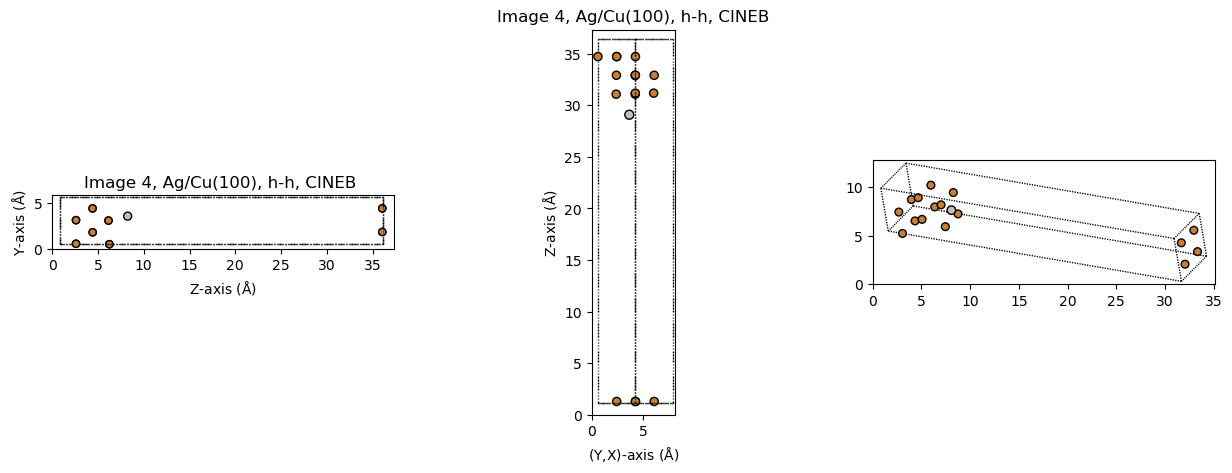

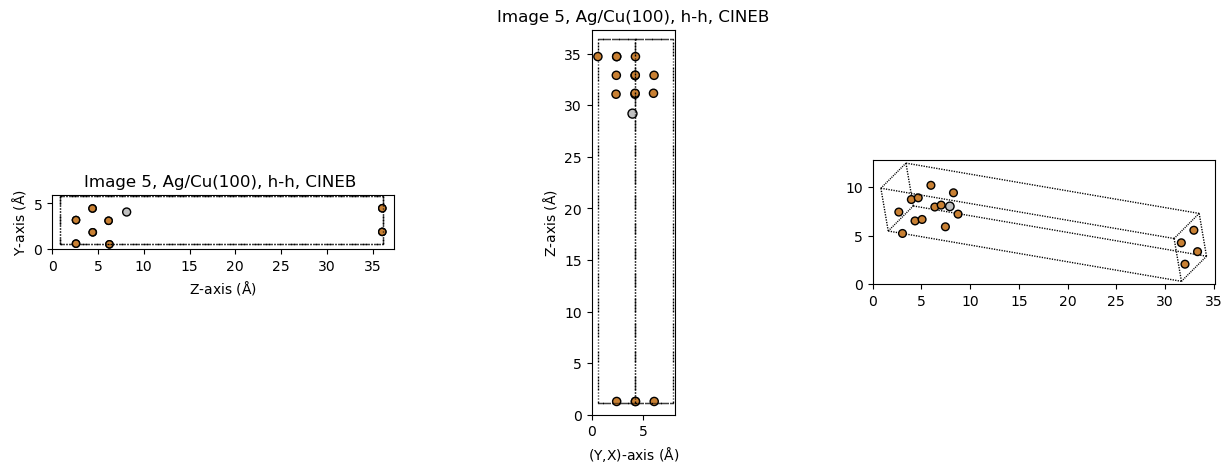

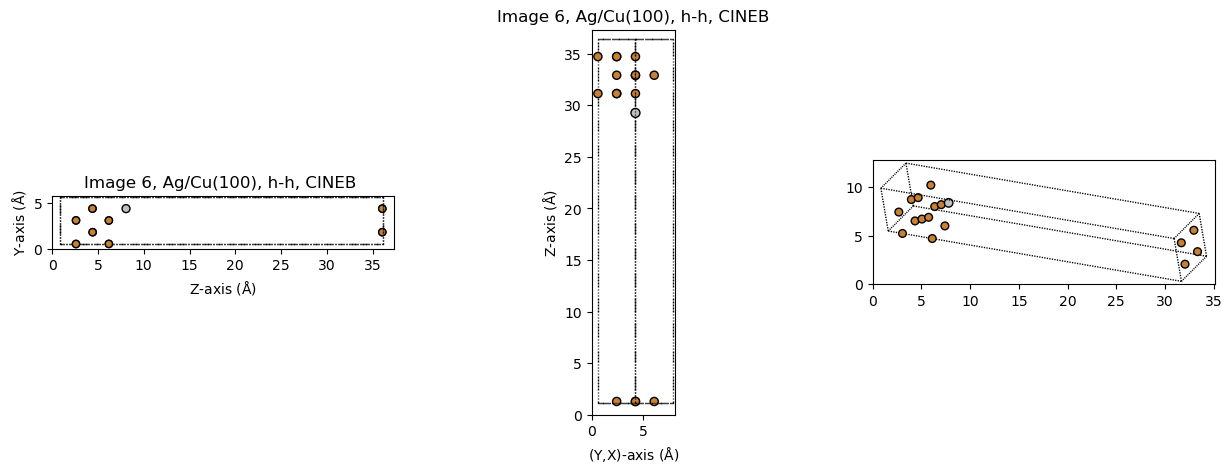

In [14]:
plot_structures(material='Ag/Cu(100)', transition='h-h', neb_type='CINEB')

#### calculate hopping rate of Ag

In [21]:
prefactor = 4.71565382*10**12
E_activation =  0.381585
k_boltz = 8.61733326*10**-5
T = [150, 300, 450]

In [20]:
for t in T:
    k = prefactor*math.exp(-E_activation/(k_boltz*t))
    print('T: ', t, ' k: ', k)

T:  150  k:  0.7126071684581047
T:  300  k:  1833141.7610481859
T:  450  k:  251175922.54612517
